# Data Fitting with Least Squares

In [53]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import random
%matplotlib inline

https://www.riaa.com/u-s-sales-database/

In [54]:
CassetteSales = np.array([15,15.3,16.2,21.8,36.9,61.3,78.5,99,124,183.2,
       236.8,332,339.1,344.5,410,450.1,446.2,442.2,
       360.1,366.4,339.5,345.4,272.6,225.3,172.6,
        158.5,123.6,76,45,31.1,17.2,5.2,2.5,0.7,0.4,0.1])
year = np.array(range(1973,2009))
print(len(CassetteSales),len(year))

36 36


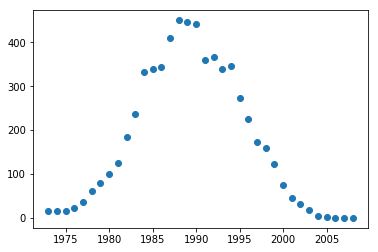

In [55]:
pt.plot(year, CassetteSales, "o")

## Creating fake data random

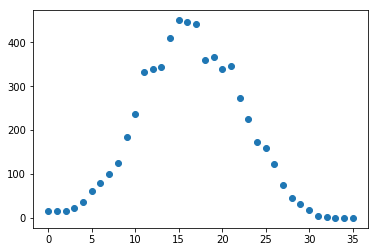

In [67]:
index = [[7,8,9],[12,13,14],[19,20,21],[24,25,26]]
choice_i = random.randint(0,3)

x = year - 1973#np.delete(year,index[choice_i]) - 1973
y = CassetteSales #np.delete(CassetteSales,index[choice_i])

pt.plot(x, y, "o")

In [68]:
def func(n,t,coeffs):
    f = 0*t
    for i in range(n+1):
        f = f + coeffs[i]*t**i    
    return f

In [71]:
n = 5# polynomial degree
A = np.array([
    x**i
    for i in range(n+1)
    ]).T


U, sigma, VT = la.svd(A,full_matrices=False)
coeffs = VT.T@((U.T@y) / sigma)
print("sigma = ",sigma)
print(coeffs)

coeffs,residual,rank,sval = la.lstsq(A,y)
print(coeffs)

coeffs = la.solve(A.T@A,A.T@y)
print(coeffs)

print(la.cond(A))

sigma =  [  1.01152966e+08   3.14656151e+05   2.79934929e+03   6.07419323e+01
   3.82145336e+00   1.10929318e+00]
[  5.72573734e+01  -6.51656089e+01   1.72565615e+01  -1.10511676e+00
   2.61803209e-02  -2.05580695e-04]
[  5.72573734e+01  -6.51656089e+01   1.72565615e+01  -1.10511676e+00
   2.61803209e-02  -2.05580695e-04]
[  5.72573736e+01  -6.51656089e+01   1.72565615e+01  -1.10511676e+00
   2.61803209e-02  -2.05580695e-04]
91186863.3526


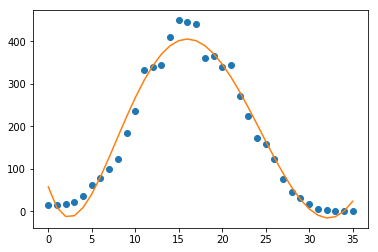

In [72]:
pt.plot(x, y, "o")
pt.plot(func(n,x,coeffs))